In [5]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

# This is just until temporary implementation
import os 
import sys
cwd = os.getcwd()
sys.path.insert(0,cwd + '/../timetransformers')


import Transformer 

%matplotlib inline
%config InlineBackend.figure_format='retina'

torch.Size([4096, 51]) torch.Size([4096, 50]) torch.Size([4096, 1])


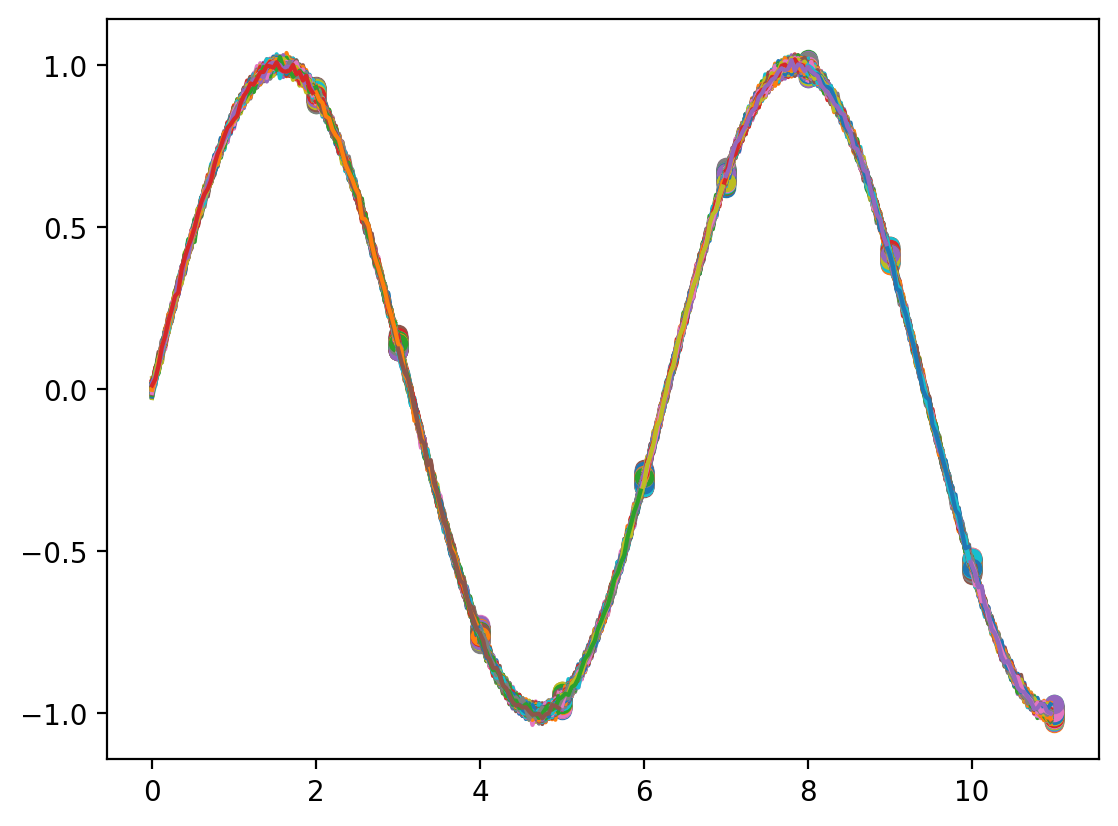

In [6]:
# Ok lets try something slightly different. Can we get a very simple MLP to work
# We will have it take in 3 data points and predict the next one
batch_size_MLP = 4096
sequence_length_MLP = 50


def gen_sin_training_data_MLP(batch_size, input_length=5):
    # Generate random start points
    start_points = torch.randint(0, 10, (batch_size,))
    batch_times = torch.stack(
        [
            torch.linspace(start_point.item(), start_point.item() + 2, input_length + 1)
            for start_point in start_points
        ]
    )
    y_vals = torch.stack(
        [
            torch.sin(batch_time) + torch.randn(input_length + 1) * 0.01
            for batch_time in batch_times
        ]
    )
    # The v values for the training should be the next data point
    return (
        batch_times,
        y_vals[:, :input_length],
        y_vals[:, -1].unsqueeze(-1),
    )


times_MLP, y_train_MLP, y_true_MLP = gen_sin_training_data_MLP(
    batch_size_MLP, sequence_length_MLP
)

print(times_MLP.shape, y_train_MLP.shape, y_true_MLP.shape)

for i in range(batch_size_MLP):
    plt.plot(times_MLP[i, :-1], y_train_MLP[i])
    plt.scatter(times_MLP[i, -1], y_true_MLP[i])

100%|██████████| 10000/10000 [00:46<00:00, 217.06it/s]


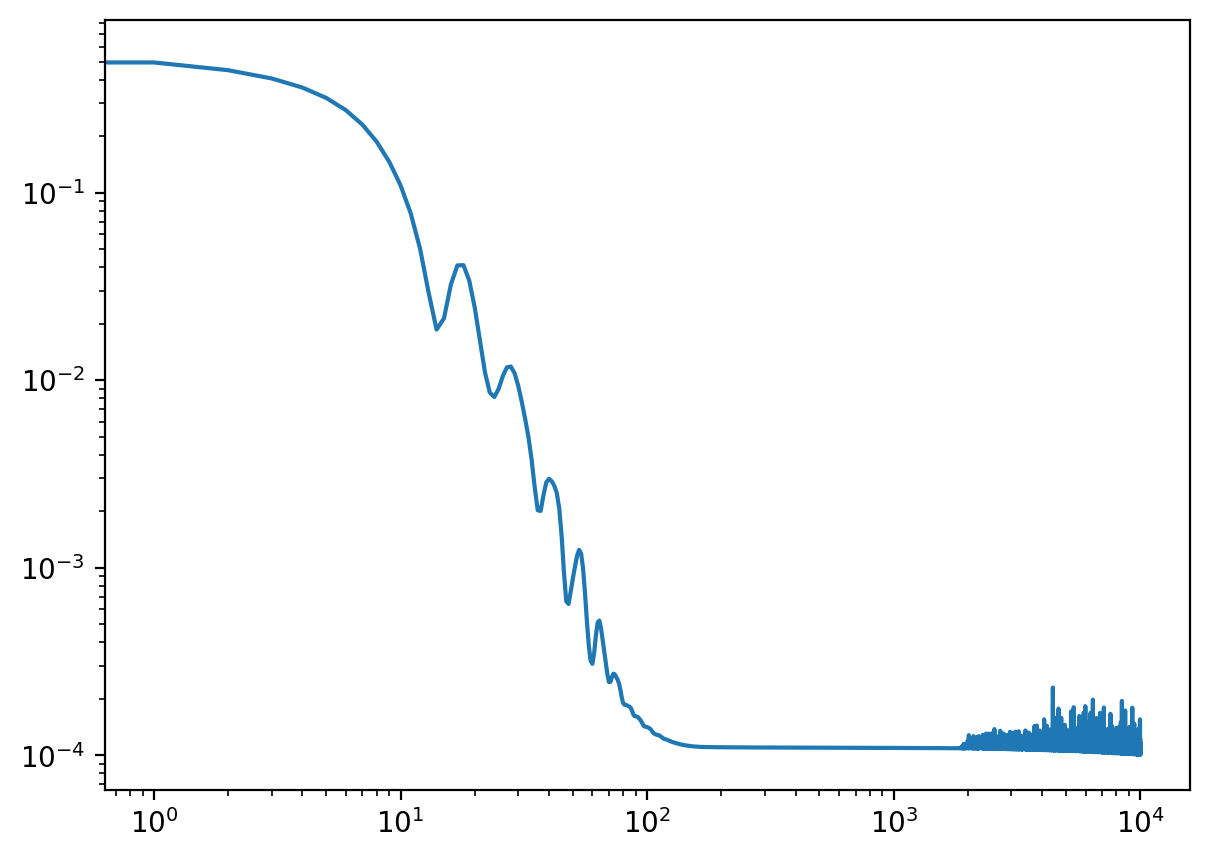

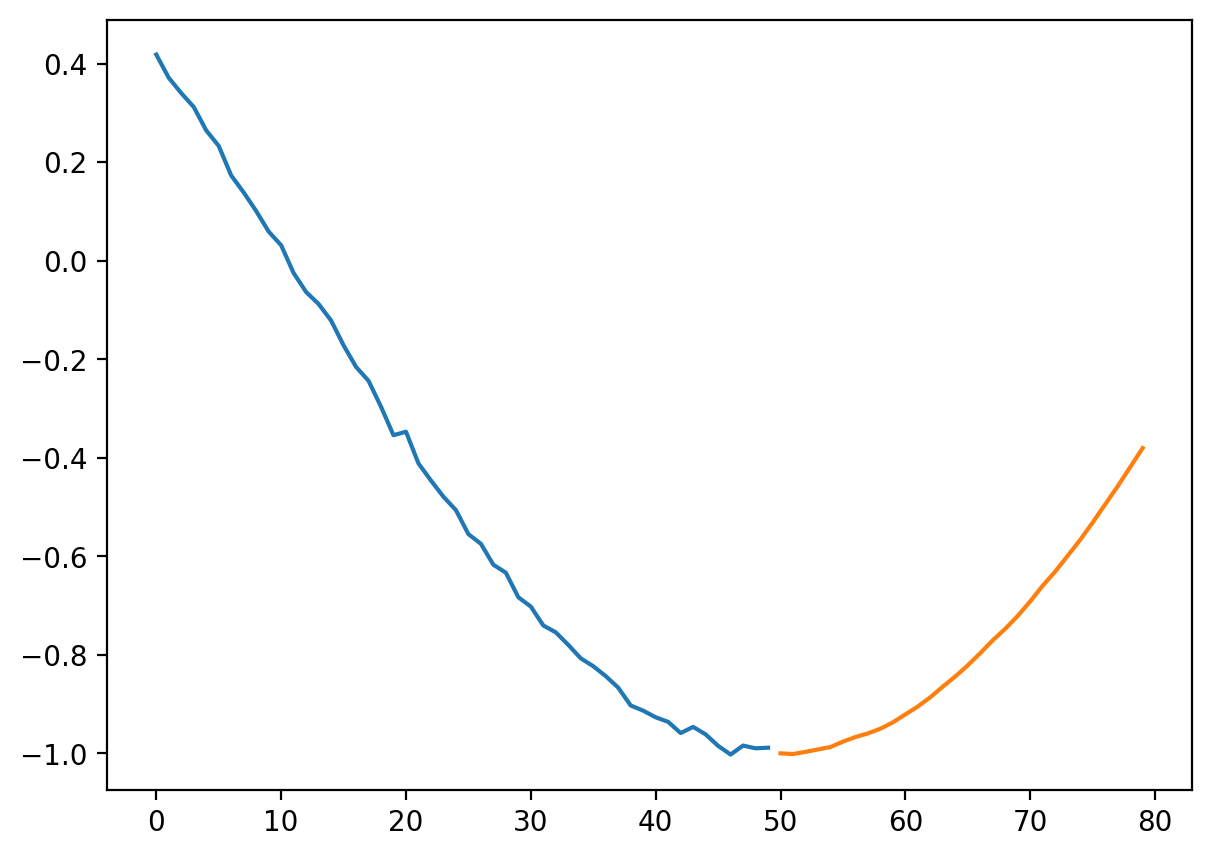

In [7]:
import importlib

importlib.reload(Transformer)

MLP = Transformer.MLP(sequence_length_MLP, 128, 1)

optimizer = optim.Adam(MLP.parameters(), lr=0.001)
criterion = nn.MSELoss()

MLP.train()

losses = []

for epoch in tqdm(range(10_000)):
    optimizer.zero_grad()
    output = MLP(y_train_MLP)
    loss = criterion(output, y_true_MLP)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

plt.figure(figsize=(7, 5))
plt.loglog(losses)
plt.show()

# Lets see how it does
MLP.eval()
generation_length = 30
y_predicted = MLP.generate(y_train_MLP[0].unsqueeze(0), generation_length)

plt.figure(figsize=(7, 5))
plt.plot(range(0, sequence_length_MLP), y_train_MLP[0])
plt.plot(
    range(sequence_length_MLP, generation_length + sequence_length_MLP),
    y_predicted.squeeze().detach().numpy(),
)
plt.show()

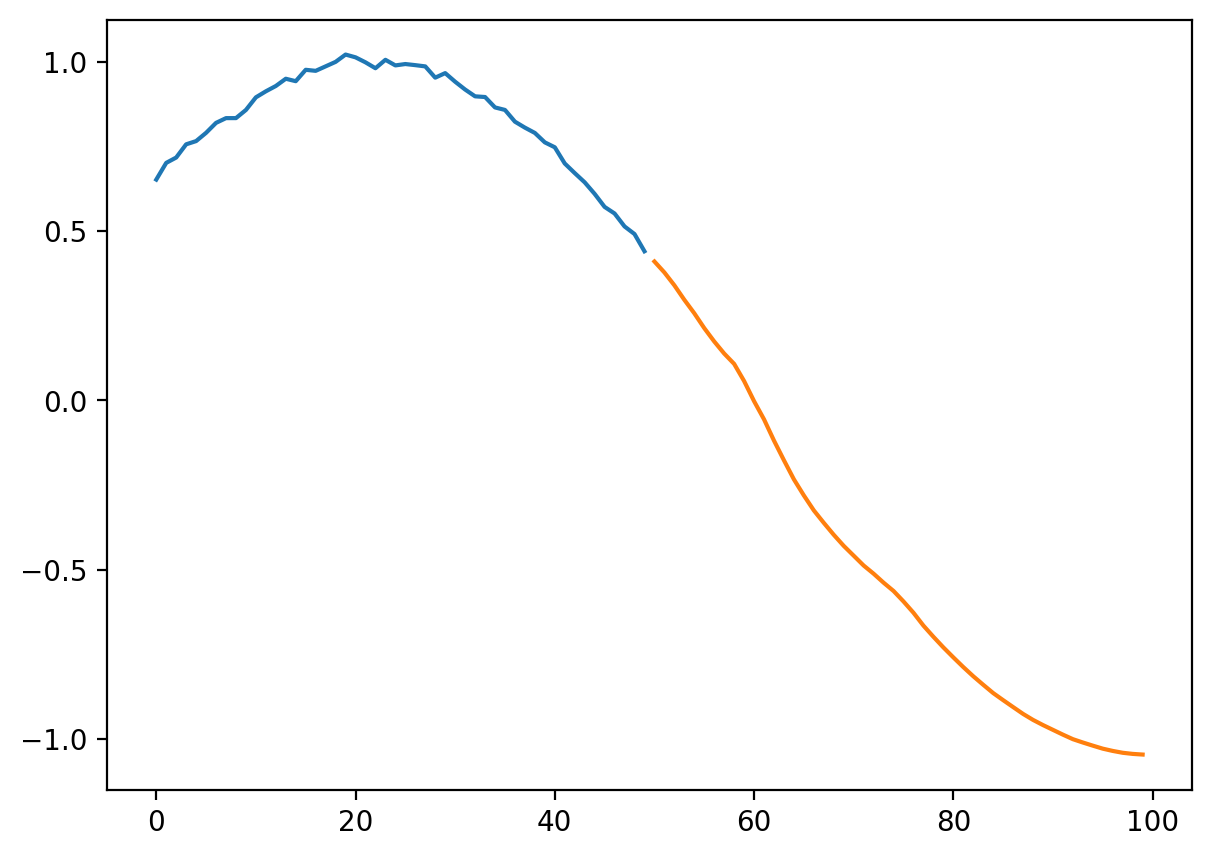

In [9]:
# Lets see how it does
MLP.eval()
index = 10
generation_length = 50
y_predicted = MLP.generate(y_train_MLP[index].unsqueeze(0), generation_length)

plt.figure(figsize=(7, 5))
plt.plot(range(0, sequence_length_MLP), y_train_MLP[index])
plt.plot(
    range(sequence_length_MLP, generation_length + sequence_length_MLP),
    y_predicted.squeeze().detach().numpy(),
)
plt.show()